<a href="https://colab.research.google.com/github/MariaArangoOchoa/Anal-tica-de-Negocios-/blob/main/Reto3_Mar%C3%ADaArangoOchoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
0. Cargar las liberias

In [ ]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


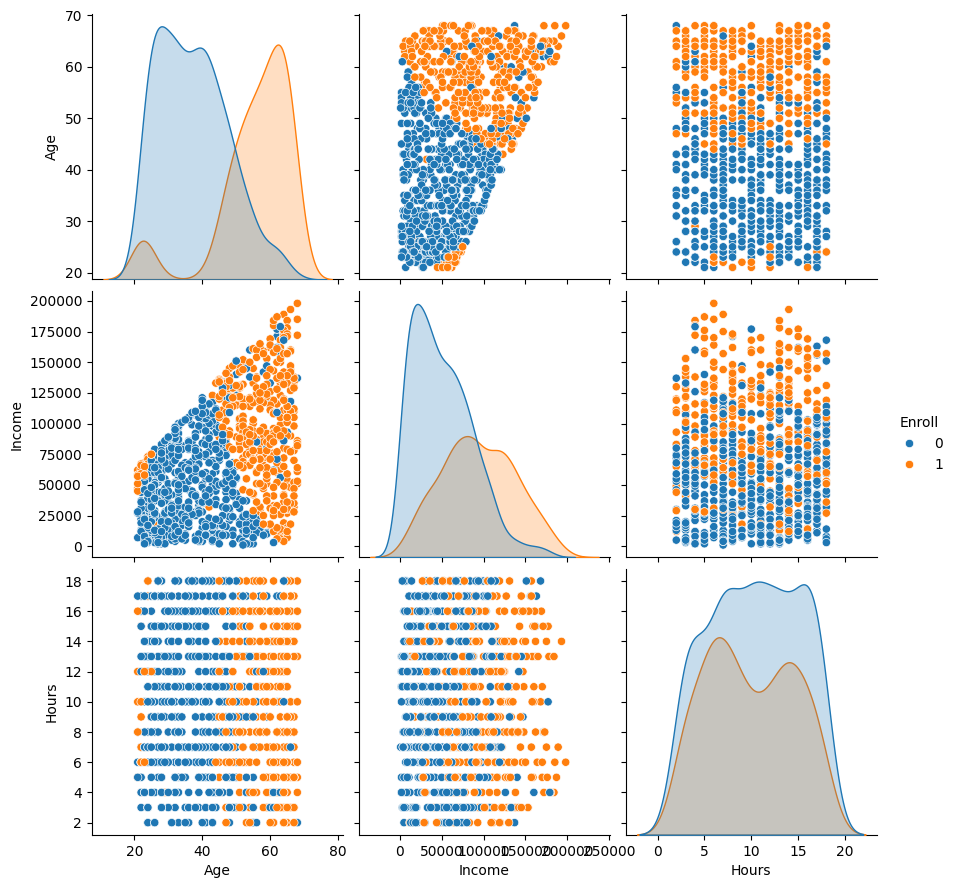

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['Age', 'Income', 'Hours', 'Enroll']]
sns.pairplot(XDB,hue='Enroll', size=3, vars=['Age', 'Income', 'Hours'])

corr=XDB.corr()
print("Esta es la matriz de correlación:\n", corr)

XD=np.array(XDB.iloc[:,0:3])
yd=np.array(XDB.iloc[:,3])


2. Implementamos el modelo KNN

Esta es la matriz de confusión:
 [[538  59]
 [145 258]]
La Exactitud Alcanzada por el Modelo es:  0.796
La Sensibilidad Alcanzada por el Modelo es:  0.6401985111662531
La Especificidad Alcanzada por el Modelo es:  0.9011725293132329
Me inscribo:  [0]


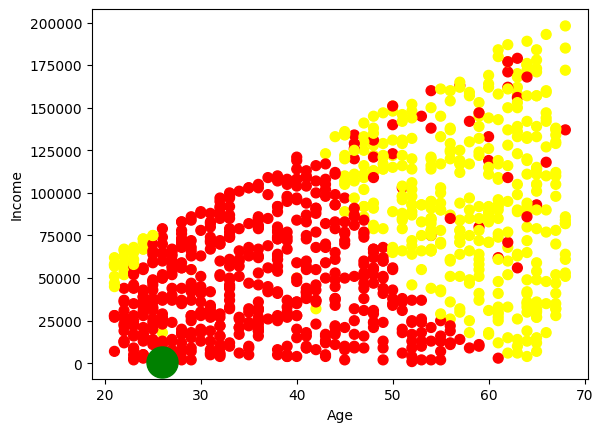

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)

ydp=mknn.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)


VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VP+VN)/(VN+VP+FN+FP)
print("La Exactitud Alcanzada por el Modelo es: ",Ex)
Sensibilidad=VP/(FN+VP)
print("La Sensibilidad Alcanzada por el Modelo es: ",Sensibilidad)
Especificidad=VN/(VN+FP)
print("La Especificidad Alcanzada por el Modelo es: ",Especificidad)

XDP=np.array([[26, 800, 15]])
ydpp=mknn.predict(XDP)
print("Me inscribo: ",ydpp)

plt.scatter(XD[:,0], XD[:,1],c=yd,s=50,cmap='autumn')
plt.scatter(XDP[:,0], XDP[:,1], marker='o',s=500,facecolors='green')
plt.xlabel('Age'); plt.ylabel('Income')
plt.show()


3. Se procede con la construcción de K-MeanShift
(Montoncitos de Datos- Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedó el primer solicitante 3
Donde quedó el segundo solicitante 3
Donde quedó el tercer solicitante 1


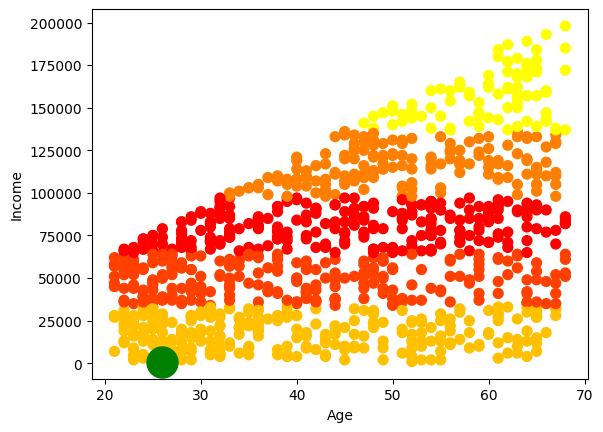

Me inscribo:  [3]
El porcentaje de no inscritos para el cluster 0 es: 0.5284552845528455
El porcentaje de inscritos para el cluster 0 es: 0.4715447154471545
El porcentaje de no inscritos para el cluster 1 es: 0.7226890756302521
El porcentaje de inscritos para el cluster 1 es: 0.2773109243697479
El porcentaje de no inscritos para el cluster 2 es: 0.3184713375796178
El porcentaje de inscritos para el cluster 2 es: 0.6815286624203821
El porcentaje de no inscritos para el cluster 3 es: 0.8487084870848709
El porcentaje de inscritos para el cluster 3 es: 0.15129151291512916
El porcentaje de no inscritos para el cluster 4 es: 0.17045454545454544
El porcentaje de inscritos para el cluster 4 es: 0.8295454545454546
Las características de cada cluster son:
 [[4.48577236e+01 8.01463415e+04 1.03333333e+01]
 [3.97478992e+01 4.93655462e+04 1.02815126e+01]
 [5.12611465e+01 1.15770701e+05 9.80891720e+00]
 [3.96900369e+01 1.77601476e+04 1.01881919e+01]
 [6.00340909e+01 1.57795455e+05 1.01363636e+01]]


In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5, init= 'random', random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_
print("Donde quedó el primer solicitante",labels[0,])
print("Donde quedó el segundo solicitante",labels[1,])
print("Donde quedó el tercer solicitante",labels[2,])

plt.scatter(XD[:,0], XD[:,1],c=labels,s=50,cmap='autumn')
plt.scatter(XDP[:,0], XDP[:,1], marker='o',s=500,facecolors='green')
plt.xlabel('Age'); plt.ylabel('Income')
plt.show()

XDP=np.array([[26, 800, 15]])
ydpp2=mkm.predict(XDP)
print("Me inscribo: ",ydpp2)

c00=len(np.where((labels==0) & (yd==0))[0])
c01=len(np.where((labels==0) & (yd==1))[0])
print("El porcentaje de no inscritos para el cluster 0 es:", c00/(c00+c01))
print("El porcentaje de inscritos para el cluster 0 es:", c01/(c00+c01))

c10=len(np.where((labels==1) & (yd==0))[0])
c11=len(np.where((labels==1) & (yd==1))[0])
print("El porcentaje de no inscritos para el cluster 1 es:", c10/(c10+c11))
print("El porcentaje de inscritos para el cluster 1 es:", c11/(c10+c11))

c20=len(np.where((labels==2) & (yd==0))[0])
c21=len(np.where((labels==2) & (yd==1))[0])
print("El porcentaje de no inscritos para el cluster 2 es:", c20/(c20+c21))
print("El porcentaje de inscritos para el cluster 2 es:", c21/(c20+c21))

c30=len(np.where((labels==3) & (yd==0))[0])
c31=len(np.where((labels==3) & (yd==1))[0])
print("El porcentaje de no inscritos para el cluster 3 es:", c30/(c30+c31))
print("El porcentaje de inscritos para el cluster 3 es:", c31/(c30+c31))

c40=len(np.where((labels==4) & (yd==0))[0])
c41=len(np.where((labels==4) & (yd==1))[0])
print("El porcentaje de no inscritos para el cluster 4 es:", c40/(c40+c41))
print("El porcentaje de inscritos para el cluster 4 es:", c41/(c40+c41))



clusters=mkm.cluster_centers_
print("Las características de cada cluster son:\n",clusters)

4. Se determina número de individuos que hacen parte de la membresía

In [ ]:
cluster_counts = np.bincount(labels)

for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} individuos")

Maximum_Age=np.argmax(clusters[:,0])
print("La edad máxima es:", Maximum_Age)

Maximum_Income=np.argmax(clusters[:,1])
print("Los Ingresos Máximos son:", Maximum_Income)

Maximum_Hours=np.argmax(clusters[:,2])
print("Las Horas Máximas son:", Maximum_Hours)


Cluster 0: 246 individuos
Cluster 1: 238 individuos
Cluster 2: 157 individuos
Cluster 3: 271 individuos
Cluster 4: 88 individuos
La edad máxima es: 4
Los Ingresos Máximos son: 4
Las Horas Máximas son: 0


Análisis:

En este cuaderno se implementó el modelo KNN y K-Means para determinar la inscripción de una persona al Fitness Center, usando como variables la Edad, los Ingresos, las Horas e Inscripción como la variable de salida. Como resultado, se pudo ver en la matriz de correlación que las variables que tenían mayor correlación fueron la de Edad e Inscripción, con un coeficiente de 0.64. Más aún, se ve una exactitud de 79.6%, junto a una sensibilidad del 64% y una especifidad de 90%.

Por otro lado, una persona con las características de 26 años, unos ingresos de 800 y 15 horas de gimnasio, con el modelo KNN se mostró como resultado que no estaría inscrito, mientras el modelo K-Means lo califica como en el cluster número 3. Es así como se llegó a la gráfica la ubicación del individuo. Con respecto a los resultados, se vio en el modelo K-Means que había un 85% de personas no incritas, y un 15% inscritas.

Detallando los clusters, el cluster 3 tuvo el mayor número de individuos, similares al del 0 y el 1; el 2 y 4 son los clusters con diferencias mayores que los otros. Por último, se muestra que el cluster con edad máxima e ingresos máximos es el cluster 4, mientras las mayores horas en el gimnasio lo tuvo el cluster 0.